In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("household_power_consumption.txt", sep=';', 
                 parse_dates={'DateTime':['Date','Time']},
                 infer_datetime_format=True, na_values='?', low_memory=False)

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9376\2119049455.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("household_power_consumption.txt", sep=';',
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9376\2119049455.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("household_power_consumption.txt", sep=';',
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9376\2119049455.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("household_power_consumption.txt", sep=';',


Shape of dataset: (2075259, 8)

Data Types:
 DateTime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

Missing Values:
 DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Summary Statistics:
                             DateTime  Global_active_power  \
count                        2075259         2.049280e+06   
mean   2008-12-06 07:12:59.999994112         1.091615e+00   
min              2006-12-16 17:24:00         7.600000e-02   
25%              2007-12-12 00:18:30         3.080000e-01   
50%            

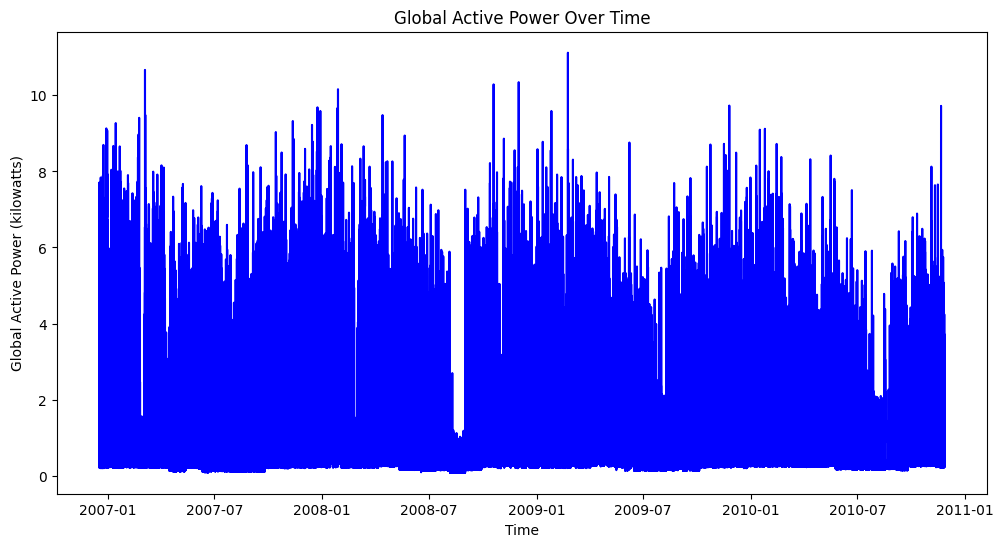

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df['DateTime'], df['Global_active_power'], color='blue')
plt.title("Global Active Power Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kilowatts)")
plt.show()

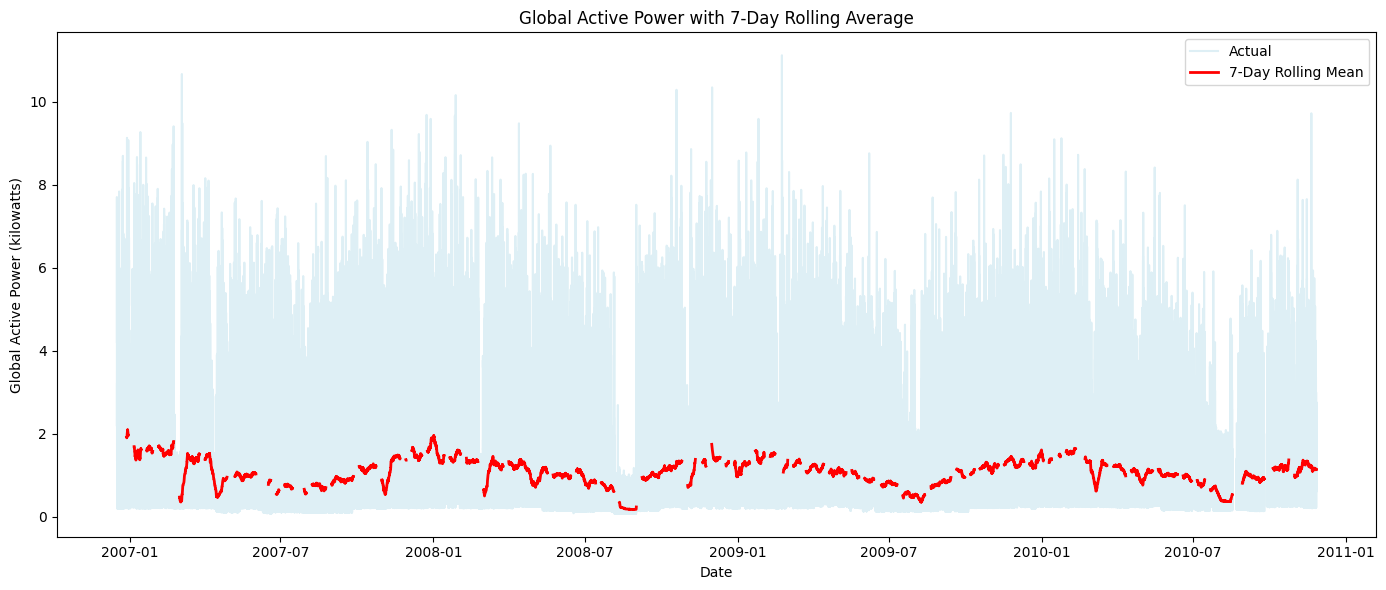

In [16]:
# Create a 7-day rolling mean
df['rolling_mean'] = df['Global_active_power'].rolling(window=60*24*7).mean()  # 60 min * 24 hrs * 7 days

plt.figure(figsize=(14,6))
plt.plot(df['DateTime'], df['Global_active_power'], color='lightblue', alpha=0.4, label='Actual')
plt.plot(df['DateTime'], df['rolling_mean'], color='red', linewidth=2, label='7-Day Rolling Mean')
plt.title("Global Active Power with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kilowatts)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\2156599154.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='DateTime')['Global_active_power'].mean()


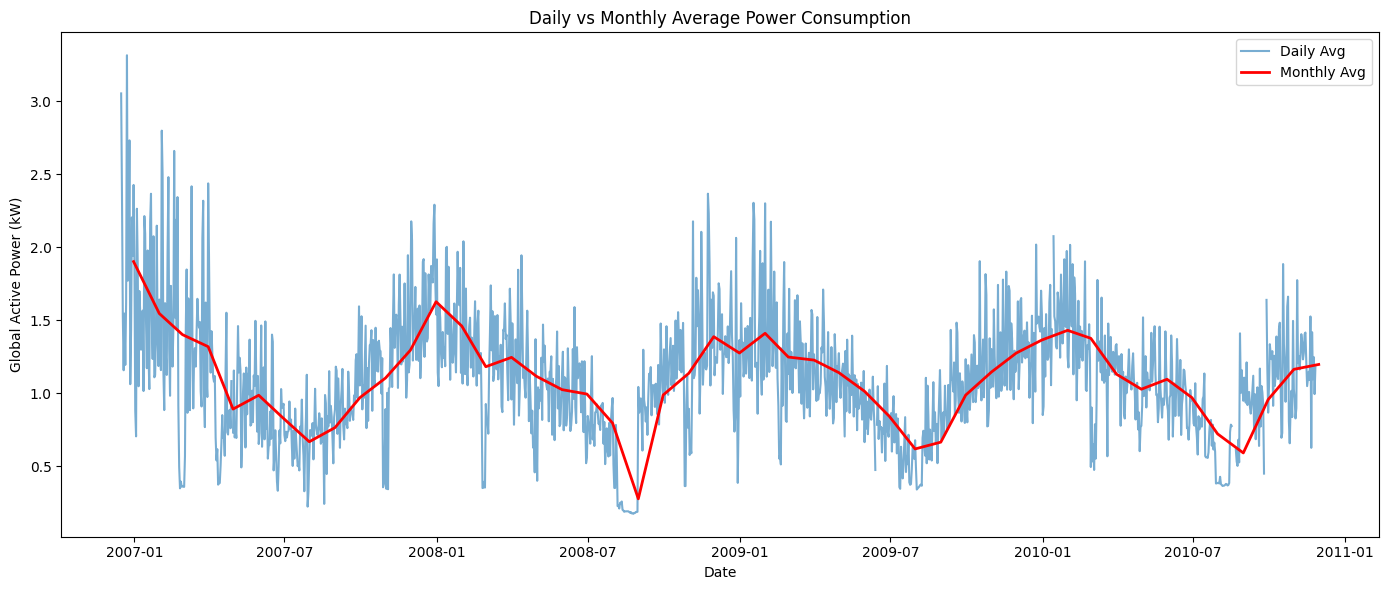

In [17]:
# Daily average
daily = df.resample('D', on='DateTime')['Global_active_power'].mean()
# Monthly average
monthly = df.resample('M', on='DateTime')['Global_active_power'].mean()

plt.figure(figsize=(14,6))
plt.plot(daily, label='Daily Avg', alpha=0.6)
plt.plot(monthly, color='red', linewidth=2, label='Monthly Avg')
plt.title("Daily vs Monthly Average Power Consumption")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.tight_layout()
plt.show()


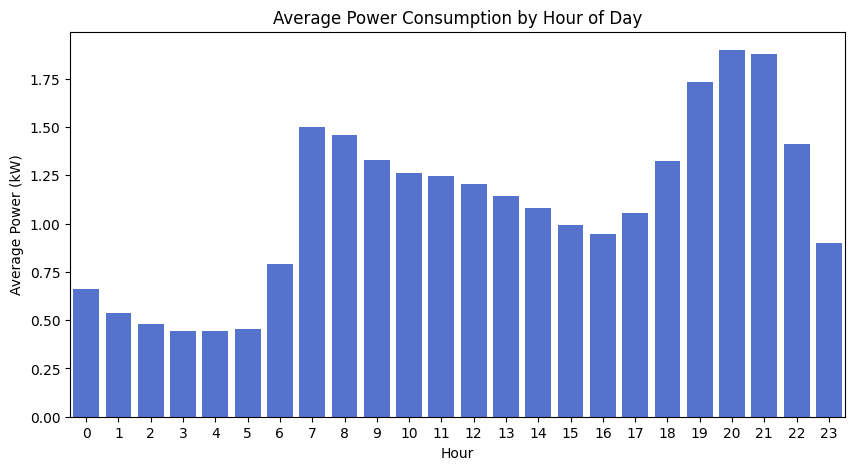

In [19]:
hourly_avg = df.groupby('Hour')['Global_active_power'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Global_active_power', data=hourly_avg, color='royalblue')
plt.title("Average Power Consumption by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Power (kW)")
plt.show()


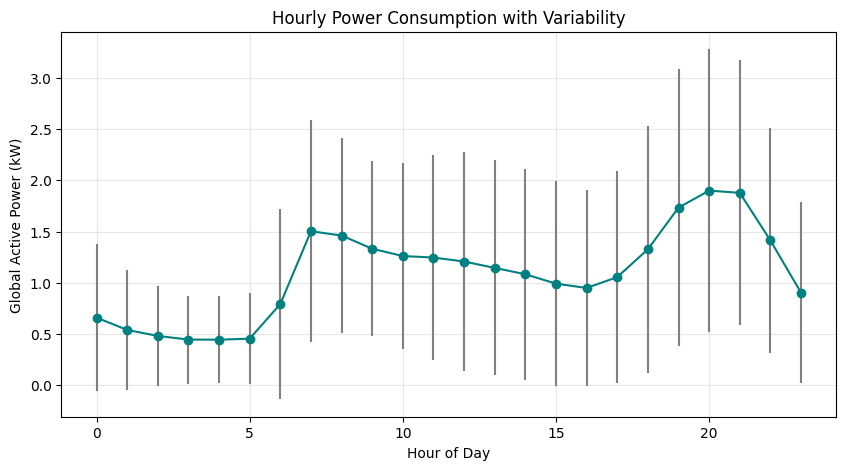

In [20]:
hourly_stats = df.groupby('Hour')['Global_active_power'].agg(['mean','std']).reset_index()

plt.figure(figsize=(10,5))
plt.errorbar(hourly_stats['Hour'], hourly_stats['mean'], yerr=hourly_stats['std'], fmt='-o', color='teal', ecolor='gray')
plt.title("Hourly Power Consumption with Variability")
plt.xlabel("Hour of Day")
plt.ylabel("Global Active Power (kW)")
plt.grid(alpha=0.3)
plt.show()


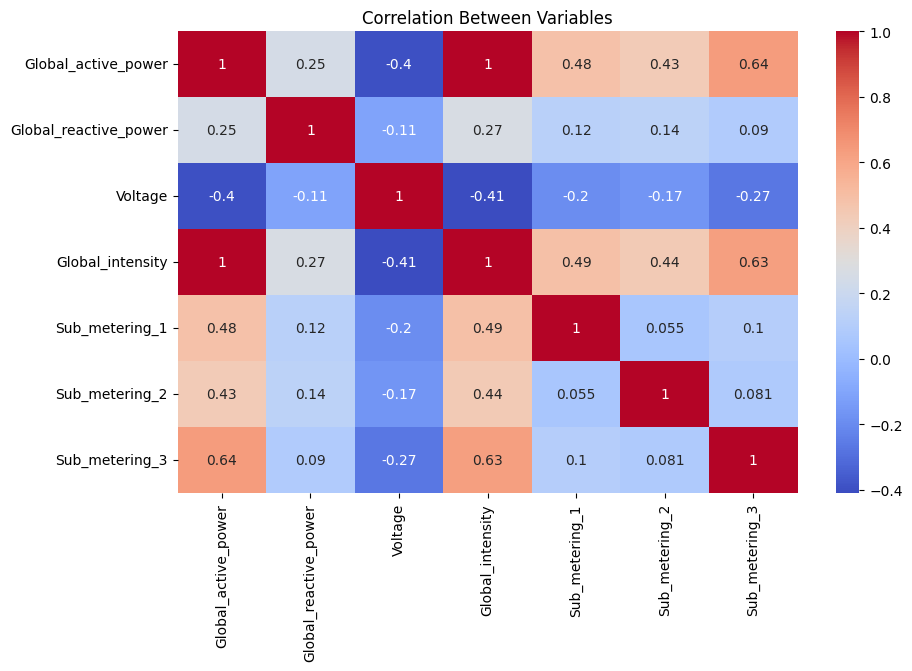

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

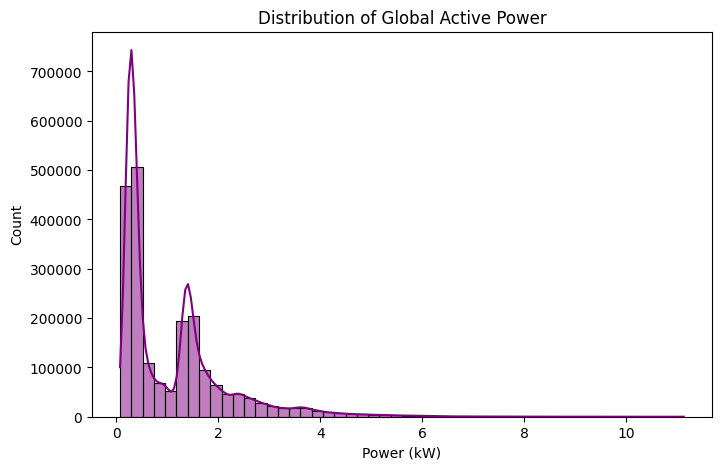

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='purple')
plt.title("Distribution of Global Active Power")
plt.xlabel("Power (kW)")
plt.show()

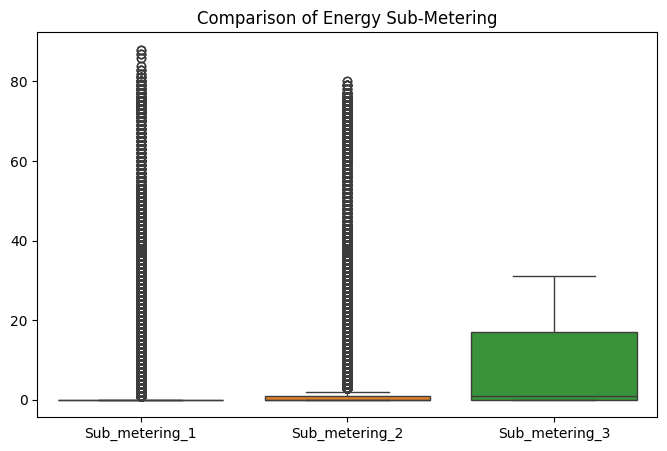

In [3]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title("Comparison of Energy Sub-Metering")
plt.show()

In [7]:
df = df.dropna()
df = df.sort_values('DateTime')
df.set_index('DateTime', inplace=True)

# Convert power to kW
df['Global_active_power'] = df['Global_active_power'].astype(float)

# Resample to hourly consumption
hourly = df['Global_active_power'].resample('H').mean().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2448\3447330430.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df['Global_active_power'].resample('H').mean().reset_index()


In [8]:
hourly['hour'] = hourly['DateTime'].dt.hour
hourly['day'] = hourly['DateTime'].dt.day
hourly['month'] = hourly['DateTime'].dt.month
hourly['dayofweek'] = hourly['DateTime'].dt.dayofweek
hourly['is_weekend'] = (hourly['dayofweek'] >= 5).astype(int)

In [95]:
from prophet import Prophet

# Prepare data
df_prophet = hourly.rename(columns={'DateTime': 'ds', 'Global_active_power': 'y'})

# Train Prophet
model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=True)
model_prophet.fit(df_prophet)

# Forecast next 24 hours
future = model_prophet.make_future_dataframe(periods=24, freq='H')
forecast = model_prophet.predict(future)

# Add Prophet predictions back to your original DataFrame
hourly['prophet_pred'] = forecast['yhat'][:len(hourly)].values

# Compute residuals using the correct column name
hourly['residual'] = hourly['Global_active_power'] - hourly['prophet_pred']



21:04:29 - cmdstanpy - INFO - Chain [1] start processing
21:04:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Lenovo\Downloads\YOLO pose detection\posture_venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


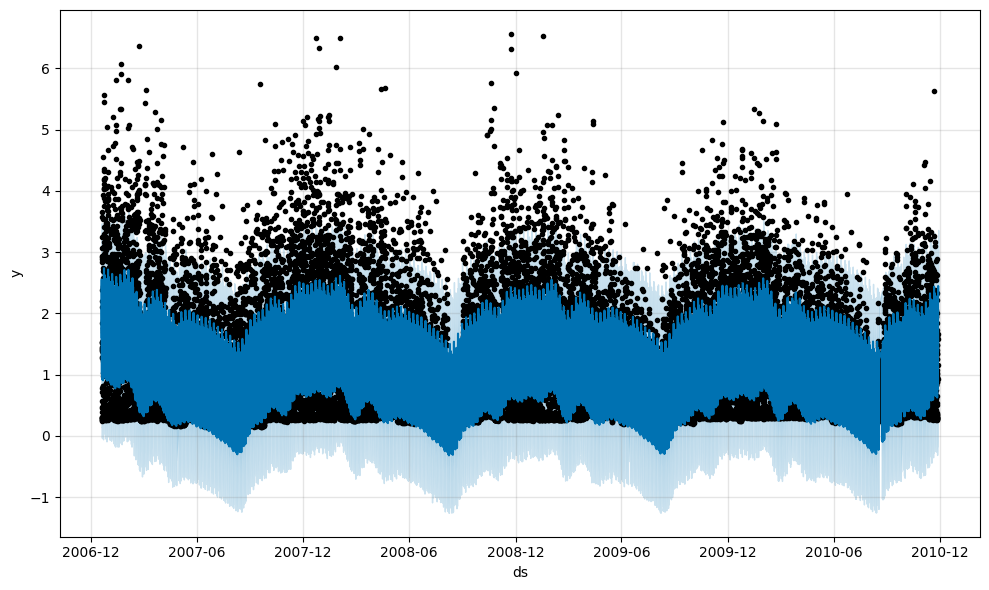

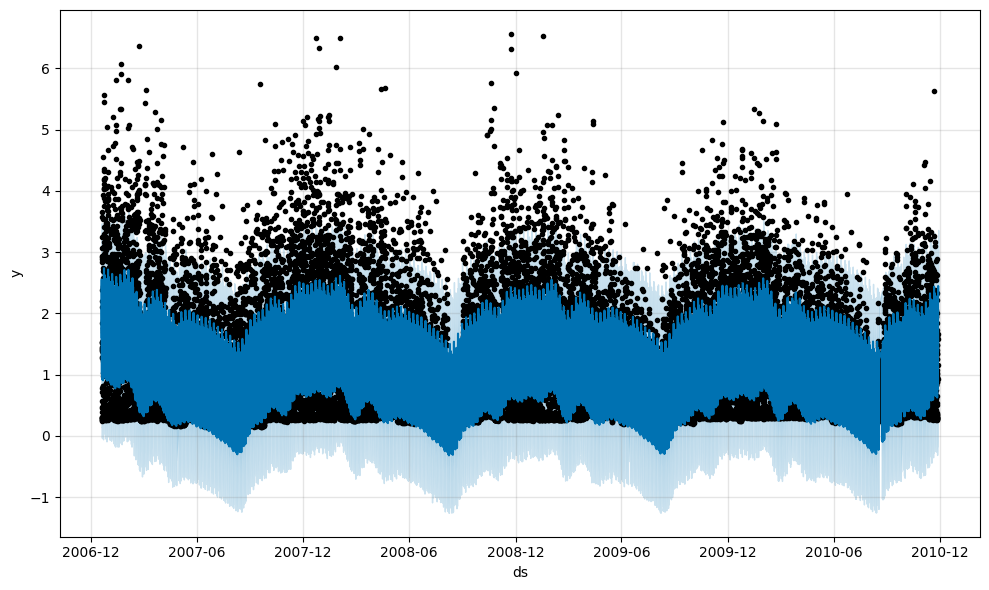

In [96]:
model_prophet.plot(forecast)

In [59]:
import numpy as np
hourly = hourly.dropna(subset=['residual']).reset_index(drop=True)
print("Residuals summary:")
print(hourly['residual'].describe())
print("Any NaN:", hourly['residual'].isna().sum())
print("Any Inf:", np.isinf(hourly['residual']).sum())



Residuals summary:
count    34120.000000
mean        -0.000419
std          0.728324
min         -2.163386
25%         -0.484224
50%         -0.085515
75%          0.366217
max          4.982052
Name: residual, dtype: float64
Any NaN: 0
Any Inf: 0


In [92]:

from sklearn.preprocessing import MinMaxScaler

# Scale the residuals
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(hourly[['residual']])

# Create sliding windows (using past 24 hours to predict the next hour’s residual)
X, y = [], []
for i in range(24, len(scaled_residuals)):
    X.append(scaled_residuals[i-24:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)   # reshape for LSTM input


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

tf.keras.backend.clear_session()

model = Sequential([
    # Input layer
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1),
         kernel_initializer='glorot_uniform',  # stable Xavier init
         recurrent_initializer='orthogonal'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second layer for deeper temporal learning
    LSTM(32),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer - bounded output
    Dense(1, activation='tanh')  # ensures output stays between -1 and 1
])

# Optimizer with strict gradient control
optimizer = Adam(learning_rate=5e-5, clipnorm=1.0)

model.compile(optimizer=optimizer, loss='mse')

# Early stopping to prevent drift
es = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(X, y, epochs=30, batch_size=64, verbose=1, callbacks=[es])


c:\Users\Lenovo\Downloads\YOLO pose detection\posture_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.3028
Epoch 2/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.1913
Epoch 3/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.1417
Epoch 4/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.1029
Epoch 5/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0762
Epoch 6/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0569
Epoch 7/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0441
Epoch 8/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0348
Epoch 9/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0277
Epoch 10/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0233
Epoch 11/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0198
Epoch 12/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0170
Epoch 13/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0153
Epoch 14/30
533/533 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0134
Epoch 15/30
533/533 ━━━━━━━━━

In [84]:
# # Ensure no NaNs before aligning

# residual_preds = model.predict(X)
# residual_preds = scaler.inverse_transform(residual_preds)

# # Trim both arrays to same length
# min_len = min(len(hourly), len(residual_preds))

# # Take the last matching rows for both
# hourly = hourly.iloc[-min_len:].copy()
# hourly = hourly.iloc[-min_len:].copy()

# hourly['lstm_residual_pred'] = residual_preds[-min_len:].reshape(-1)

# # Force positional assignment (ignore index alignment)
# hourly['hybrid_pred'] = hourly['prophet_pred'].iloc[-min_len:].to_numpy() + hourly['lstm_residual_pred'].to_numpy()
residual_preds = model.predict(X)



1066/1066 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step


In [86]:
# Remove duplicated columns by name
hourly = hourly.loc[:, ~hourly.columns.duplicated()]

# If still present, drop explicitly
if list(hourly.columns).count('lstm_residual_pred') > 1:
    hourly = hourly.drop(columns=['lstm_residual_pred'], errors='ignore')
print("Prophet range:", hourly['prophet_pred'].min(), hourly['prophet_pred'].max())
print("Residual preds range:", hourly['lstm_residual_pred'].min(), hourly['lstm_residual_pred'].max())
print("Residual mean/std:", hourly['lstm_residual_pred'].mean(), hourly['lstm_residual_pred'].std())
print("Pred range:", residual_preds.min(), residual_preds.max())


Prophet range: -0.31655484382971477 2.7501931602148475
Residual preds range: -1036.7067 944.28937
Residual mean/std: -149.64426 183.25629
Pred range: 0.10268791 0.66953266


In [89]:


# 1️⃣ Predict residuals

residual_preds = np.array(residual_preds)
# If LSTM returned 2 columns, take only the first one
if residual_preds.ndim == 2 and residual_preds.shape[1] > 1:
    print(f"⚠️  LSTM output has {residual_preds.shape[1]} columns — taking the first one only.")
    residual_preds = residual_preds[:, 0]

# 2️⃣  Inverse scale (expects 2D input)
residual_preds = residual_preds.reshape(-1, 1)
residual_preds = scaler.inverse_transform(residual_preds).reshape(-1,)

# 3️⃣  Align lengths
hourly = hourly.reset_index(drop=True)
min_len = min(len(hourly), len(residual_preds))
hourly = hourly.iloc[-min_len:].copy()
residual_preds = residual_preds[-min_len:]

# 4️⃣  Add LSTM residual + Hybrid forecast
hourly['lstm_residual_pred'] = residual_preds
hourly['hybrid_pred'] = hourly['prophet_pred'].to_numpy() + hourly['lstm_residual_pred'].to_numpy()

# 5️⃣  Drop any NaNs
hourly.dropna(subset=['Global_active_power', 'prophet_pred', 'hybrid_pred'], inplace=True)

print("✅ Alignment check:")
print(hourly.isna().sum())
print("Shape:", hourly.shape)


✅ Alignment check:
DateTime               0
Global_active_power    0
hour                   0
day                    0
month                  0
dayofweek              0
is_weekend             0
prophet_pred           0
residual               0
lstm_residual_pred     0
hybrid_pred            0
dtype: int64
Shape: (34096, 11)


Prophet MAE: 0.546
Hybrid MAE:  0.415


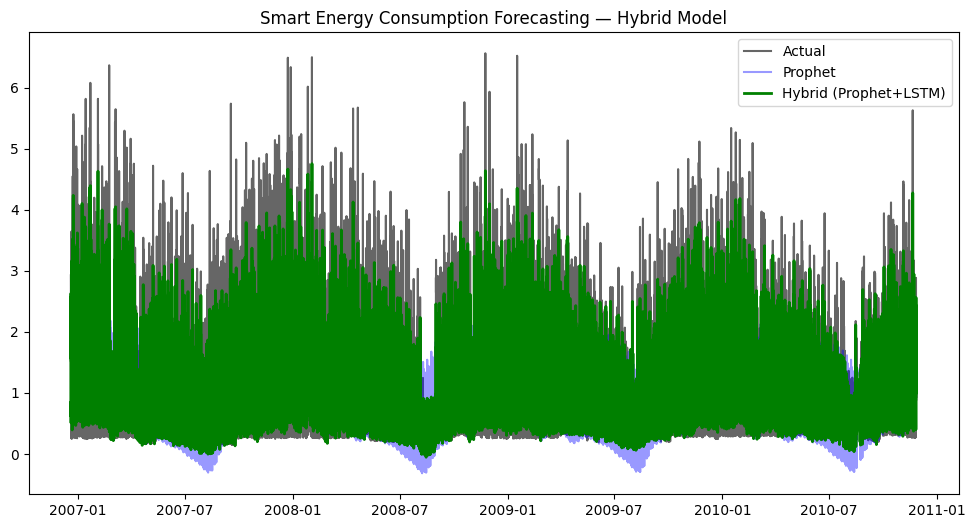

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

mae_prophet = mean_absolute_error(hourly['Global_active_power'], hourly['prophet_pred'])
mae_hybrid  = mean_absolute_error(hourly['Global_active_power'], hourly['hybrid_pred'])

print(f"Prophet MAE: {mae_prophet:.3f}")
print(f"Hybrid MAE:  {mae_hybrid:.3f}")

plt.figure(figsize=(12,6))
plt.plot(hourly['DateTime'], hourly['Global_active_power'], label='Actual', color='black', alpha=0.6)
plt.plot(hourly['DateTime'], hourly['prophet_pred'], label='Prophet', color='blue', alpha=0.4)
plt.plot(hourly['DateTime'], hourly['hybrid_pred'], label='Hybrid (Prophet+LSTM)', color='green', linewidth=2)
plt.legend()
plt.title("Smart Energy Consumption Forecasting — Hybrid Model")
plt.show()


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Actual vs predicted
y_true = hourly['Global_active_power']
y_pred_prophet = hourly['prophet_pred']
y_pred_hybrid  = hourly['hybrid_pred']

# MAE
mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
mae_hybrid  = mean_absolute_error(y_true, y_pred_hybrid)

# RMSE
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
rmse_hybrid  = np.sqrt(mean_squared_error(y_true, y_pred_hybrid))

# MAPE (Mean Absolute Percentage Error)
# Add small epsilon to avoid division by zero
epsilon = 1e-10
mape_prophet = np.mean(np.abs((y_true - y_pred_prophet) / (y_true + epsilon))) * 100
mape_hybrid  = np.mean(np.abs((y_true - y_pred_hybrid)  / (y_true + epsilon))) * 100

# Print neatly
print(f"📊 Prophet  → MAE: {mae_prophet:.3f}, RMSE: {rmse_prophet:.3f}, MAPE: {mape_prophet:.2f}%")
print(f"⚡ Hybrid   → MAE: {mae_hybrid:.3f}, RMSE: {rmse_hybrid:.3f}, MAPE: {mape_hybrid:.2f}%")


📊 Prophet  → MAE: 0.546, RMSE: 0.728, MAPE: 87.81%
⚡ Hybrid   → MAE: 0.415, RMSE: 0.577, MAPE: 60.34%


In [98]:
import os, joblib

os.makedirs("model", exist_ok=True)

# Save Prophet (using joblib)
joblib.dump(model_prophet, "model/prophet_model.pkl")

# Save LSTM
model.save("model/lstm_model.h5")

# Save Scaler
joblib.dump(scaler, "model/scaler.pkl")

print("✅ Prophet, LSTM, and Scaler saved successfully!")

✅ Prophet, LSTM, and Scaler saved successfully!
